In [96]:
import pandas as pd
import scipy   #biblioteca necessária para obter as funções de treinamento 
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import numpy as np
from sklearn.linear_model import LinearRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2

In [98]:
df = pd.read_csv('Data/train.csv')

In [100]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [104]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [106]:
df_new = df[['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT','Q001']]
df_new = pd.concat([df_new,df.iloc[ : , df.columns.get_loc('Q002'):(df.columns.get_loc('Q050')+1)]],axis = 1)

In [108]:
df_new

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_MT,Q001,Q002,Q003,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4,436.3,495.4,581.2,520.0,1,D,D,B,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8,474.5,544.1,599.0,580.0,1,A,A,A,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,0,D,D,B,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,0,H,E,D,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,0,E,D,C,...,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,403.2,438.2,419.7,394.5,440.0,1,E,E,B,...,NaN,A,A,A,A,A,A,A,A,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,452.4,423.8,557.9,533.0,560.0,1,A,A,A,...,NaN,A,A,B,B,A,A,A,A,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,398.0,460.5,528.9,569.3,600.0,1,C,G,B,...,NaN,A,A,A,A,C,A,A,A,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,386.6,422.5,621.7,569.0,460.0,1,B,D,C,...,5.0,A,A,A,A,D,A,A,A,D


In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     13730 non-null  object 
 1   NU_NOTA_MT       10133 non-null  float64
 2   NU_NOTA_CN       10341 non-null  float64
 3   NU_NOTA_CH       10341 non-null  float64
 4   NU_NOTA_LC       10133 non-null  float64
 5   NU_NOTA_REDACAO  10133 non-null  float64
 6   TP_PRESENCA_MT   13730 non-null  int64  
 7   Q001             13730 non-null  object 
 8   Q002             13730 non-null  object 
 9   Q003             13730 non-null  object 
 10  Q004             13730 non-null  object 
 11  Q005             13730 non-null  int64  
 12  Q006             13730 non-null  object 
 13  Q007             13730 non-null  object 
 14  Q008             13730 non-null  object 
 15  Q009             13730 non-null  object 
 16  Q010             13730 non-null  object 
 17  Q011        

In [112]:
df_new.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_MT,Q001,Q002,Q003,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4,436.3,495.4,581.2,520.0,1,D,D,B,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8,474.5,544.1,599.0,580.0,1,A,A,A,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,0,D,D,B,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,0,H,E,D,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,0,E,D,C,...,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
df_dropna = df_new.copy().dropna()

In [115]:
categoricalColumns = list(df_dropna.columns)
for i in range(7):
    categoricalColumns.pop(0)
categoricalColumns

['Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q028',
 'Q029',
 'Q030',
 'Q031',
 'Q032',
 'Q033',
 'Q034',
 'Q035',
 'Q036',
 'Q037',
 'Q038',
 'Q039',
 'Q040',
 'Q041',
 'Q042',
 'Q043',
 'Q044',
 'Q045',
 'Q046',
 'Q047',
 'Q048',
 'Q049',
 'Q050']

In [117]:
df_dropna = pd.get_dummies(df_dropna, columns = categoricalColumns)

In [119]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 13728
Columns: 273 entries, NU_INSCRICAO to Q050_D
dtypes: float64(5), int64(1), object(1), uint8(266)
memory usage: 598.8+ KB


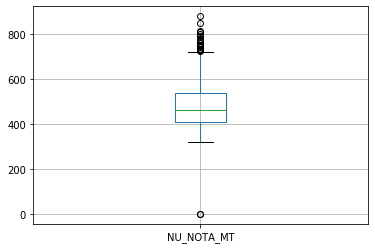

In [137]:
df_dropna.boxplot(['NU_NOTA_MT'])

In [124]:
reg = LinearRegression()

In [ ]:
x = df_dropna.iloc[ : , 2 : 272].values
y = df_dropna['NU_NOTA_MT'].values

In [127]:
x

array([[436.3, 495.4, 581.2, ...,   0. ,   0. ,   0. ],
       [420.1, 604.2, 484.5, ...,   1. ,   0. ,   0. ],
       [413.4, 407.9, 533.9, ...,   0. ,   0. ,   1. ],
       ...,
       [448.7, 596.8, 537.1, ...,   1. ,   0. ,   0. ],
       [515.6, 556.7, 459. , ...,   0. ,   0. ,   0. ],
       [422.5, 621.7, 569. , ...,   0. ,   0. ,   0. ]])

In [129]:
regressao = reg.fit(x,y) #Treina o modelo

In [131]:
previsao = reg.predict(x) #Realiza a previsão

In [133]:
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [ 4.78985901e-01  2.21284312e-01  5.62372908e-02 -1.06378760e-02
 -3.17657012e-10 -2.50105251e+00 -4.67311288e+00  2.46950697e+00
 -5.85817320e+00 -6.49866725e+00 -1.52559693e-01  1.60895202e+01
  1.12453835e+00  3.19285429e+00 -4.07168451e+00  1.21457445e+00
 -1.15365407e+00 -5.89190068e-01  2.45735506e+01 -2.01907995e-01
 -2.29645427e+01  3.33770024e+00  1.31118268e+00  7.94906655e+00
  9.99012402e+00 -2.21746466e+01 -4.13426867e-01  1.00561122e+00
 -9.36592096e-01  5.77919747e+00 -5.41197684e+00 -5.28143163e+00
  4.84519188e+00 -6.19639309e+00 -5.38803649e+00 -2.14047507e+00
 -8.08201554e+00 -4.87788917e+00 -3.73624224e+00 -1.10834243e+01
 -2.33962186e+00  1.44972532e+01 -1.52775724e+01  1.50989519e+01
 -8.22183068e+01  1.13988606e+02 -2.24483384e+00  6.92829324e+00
 -1.36433341e+01 -1.39336276e+01 -5.63056388e+00 -1.47783926e+01
 -1.81592025e+01 -5.05090002e+00 -2.14700619e+00  2.24732347e+01
 -7.37347863e+00  1.84982271e+01 -5.23065191e+01  2.07182795e+01
  1.71673278e+01  8.7

In [134]:
df_test = pd.read_csv('Data/test.csv')

In [135]:
df_test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [136]:
df_test = df_test[['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]